In [1]:
import codebase.match_data as match
import codebase.settings as settings
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib as plt
import seaborn as sns
import codebase.analysis_functions as af
import codebase.web_scrape_functions as wsf
from utils import logger
import logging
from espncricinfo import player
import requests
import utils
from datetime import datetime 
from datetime import timedelta

%load_ext autoreload
%autoreload 2
logger.handlers[1].setLevel(logging.INFO)
# logger.disabled = True
pd.get_option("display.max_columns")

20

In [14]:
def get_player_json(player_id):
    response = requests.get(f"http://core.espnuk.org/v2/sports/cricket/athletes/{player_id}")
    if response.status_code == 404:
        raise utils.PlayerNotFoundError
    else:
        return response.json()

In [16]:
sanga = get_player_json(50710)
sanga['dateOfBirth']

'1977-10-27T00:00Z'

In [22]:
age = datetime.strptime(sanga['dateOfBirth'], '%Y-%m-%dT%H:%MZ')

In [25]:
def get_player_age(player_id):
    json = get_player_json(player_id)
    age = datetime.strptime(json['dateOfBirth'], '%Y-%m-%dT%H:%MZ')
    return age

In [26]:
get_player_age(50710)

datetime.datetime(1977, 10, 27, 0, 0)

In [29]:
age = age.replace(year=age.year+30)

In [30]:
age

datetime.datetime(2007, 10, 27, 0, 0)

2022-06-16 23:43:21,807 - INFO - Getting match list for player, 50710
2022-06-16 23:43:21,808 - INFO - Getting match list for player: 50710 Dates: 2007-10-27:2008-10-27
2022-06-16 23:43:24,745 - INFO - Getting player contributions for 50710
2022-06-16 23:43:24,746 - INFO - Getting player controbutions for match 291339
2022-06-16 23:43:24,748 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\291339_match_jsons.json
2022-06-16 23:43:24,752 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\291339_html.html
2022-06-16 23:43:24,890 - INFO - Match ID 291339: Loading match comms
2022-06-16 23:43:24,893 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\full_comms\291339_full_comms.json
2022-06-16 23:43:24,952 - INFO - Pre-transforming match commentary for 291339
2022-06-16 23:43:24,985 - INFO - 291339: Processing text commentary fields
2022-06-16 23:43:25,459 -

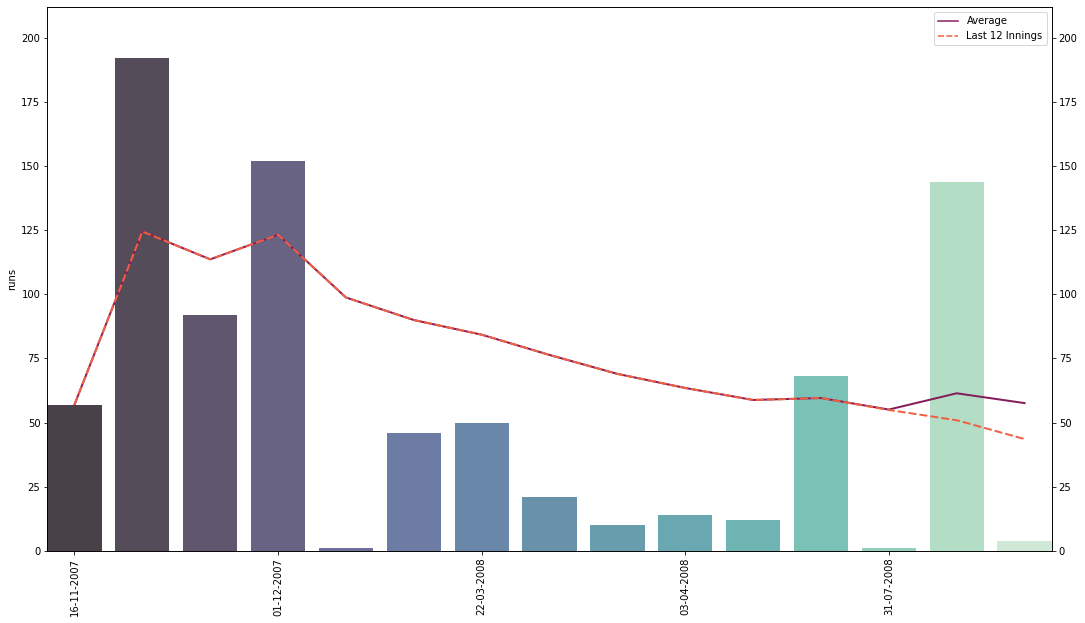

In [4]:
af.get_career_batting_graph(50710, player_age='30:31')